# Experiments on Time series generation as ARIMA



In [1]:
# automatically reaload libraries (useful when working on libraries while playing with the notebook)
%load_ext autoreload
%autoreload 2

## ARMA models

In [2]:
# allow import from parent directory
import sys,os
sys.path.append(os.getcwd() + '/..')

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
# import helper functions for dataset generation
# from ts_gen import make_binary_code_dataset,make_flat_dataset,make_slopes_dataset
# import helper functions for dataset visualization
from ts_viz import plot_list_of_ts,plot_list_of_ts_over_subplots
# import helper functions to adjust list of series according to output of the clustering
# from ts_utils import get_clustered_list

In [5]:
from generator import AR,MA,ARMA,ARIMA



### [Autoregressive model](https://en.wikipedia.org/wiki/Autoregressive_model)

the notation AR(p) refers to the autoregressive model of order p. The AR(p) model is written

![AR equation](img/ar.svg)

where $\varphi _{1},\ldots ,\varphi _{p}$ are parameters, c is a constant, and the random variable $\varepsilon _{t}$ is white noise. The value of p is called the order of the AR model.

Some constraints are necessary on the values of the parameters so that the model remains stationary. For example, processes in the AR(1) model with ${\displaystyle |\varphi _{1}|\geq 1}$ are not stationary.

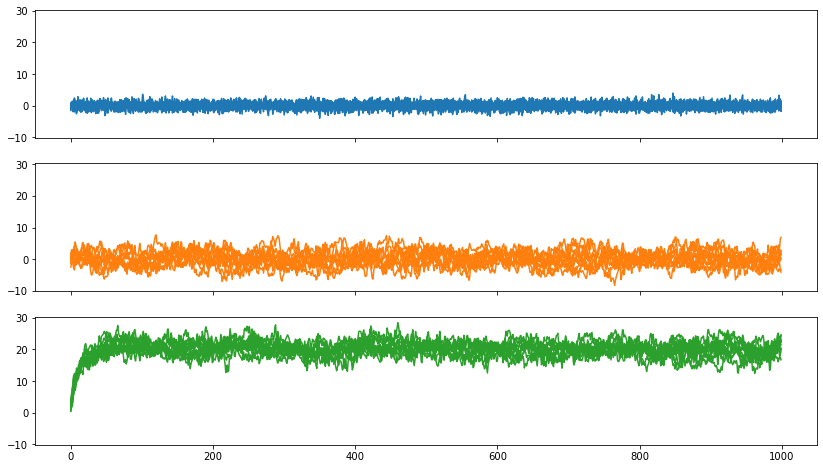

In [6]:
param_list = [{'c' : 0, 'coeff' : []},
              {'c' : 0, 'coeff' : [1,-0.2,0.1]},
              {'c' : 2, 'coeff' : [1,-0.5,0.5,-0.1]},]

samples_per_model = 10

list_of_series = []
for i,params in enumerate(param_list):
    for _ in range(samples_per_model):
        ar = AR(**params)
        list_of_series.append(pd.Series(ar.generate(n=1000),name=i))

plot_list_of_ts_over_subplots(list_of_series,figsize=(14,8));



### [Moving-Average model](https://en.wikipedia.org/wiki/Moving-average_model)

The notation MA(q) refers to the moving average model of order q:

![MA equation](img/ma.svg)

where μ is the mean of the series, the $\theta _{1},\ldots ,\theta _{q}$ are the parameters of the model and the  $\varepsilon _{t}, \varepsilon _{t-1},\ldots ,\varepsilon _{t-q}$ are white noise error terms. The value of q is called the order of the MA model

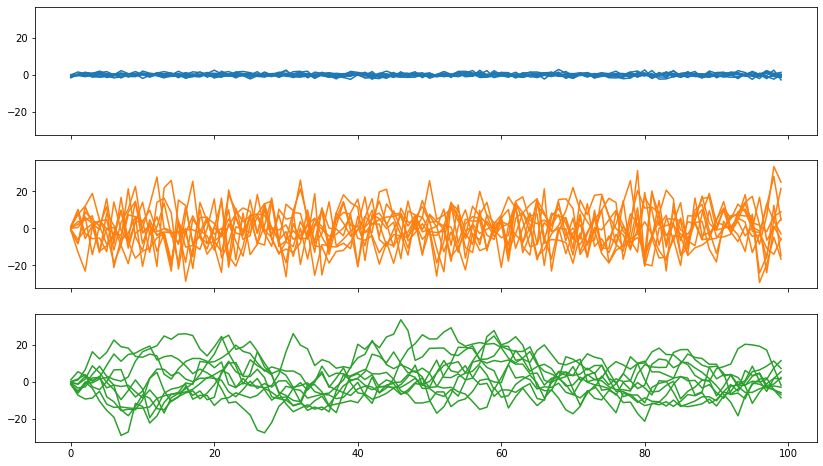

In [7]:
param_list = [{'mu' : 0, 'coeff' : []},
              {'mu' : 0, 'coeff' : [10]},
              {'mu' : 0, 'coeff' : [5,4,3,3,3,3,2,1]}]

samples_per_model = 10

list_of_series = []
for i,params in enumerate(param_list):
    for _ in range(samples_per_model):
        ma = MA(**params)
        list_of_series.append(pd.Series(ma.generate(),name=i))

plot_list_of_ts_over_subplots(list_of_series,figsize=(14,8));



### [Auto-Regressive Moving-Average model](https://en.wikipedia.org/wiki/Autoregressive%E2%80%93moving-average_model)

The notation ARMA(p, q) refers to the model with p autoregressive terms and q moving-average terms. This model contains the AR(p) and MA(q) models,

![ARMA equation](img/arma.svg)

where $\varphi _{1},\ldots ,\varphi _{p}$ are parameters of the AR component, c is a constant, the $\theta _{1},\ldots ,\theta _{q}$ are the parameters of the MA model and the $\varepsilon _{t}, \varepsilon _{t-1},\ldots ,\varepsilon _{t-q}$  are white noise error terms. The vaues (p,q) are called the AR and MA orders of the ARMA model.

The ARMA model is essentially an infinite impulse response filter applied to white noise, with some additional interpretation placed on it.



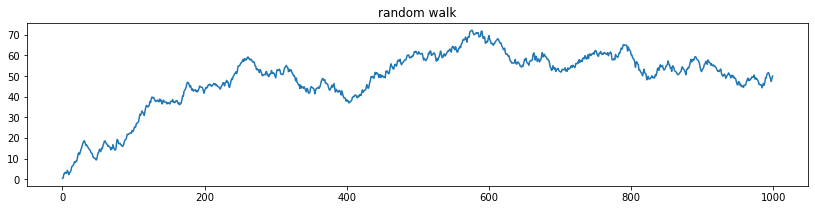

In [8]:
model = ARMA(c=0,pcoeff=[1],qcoeff=[])
s1 = pd.Series(model.generate(1000))
s1.plot(title='random walk',figsize=(14,3));

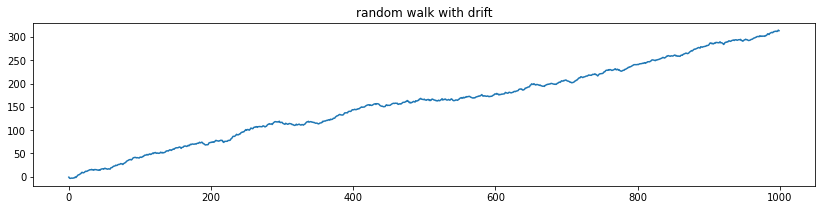

In [9]:
model = ARMA(c=0.3,pcoeff=[1],qcoeff=[])
s1 = pd.Series(model.generate(1000))
s1.plot(title='random walk with drift',figsize=(14,3));

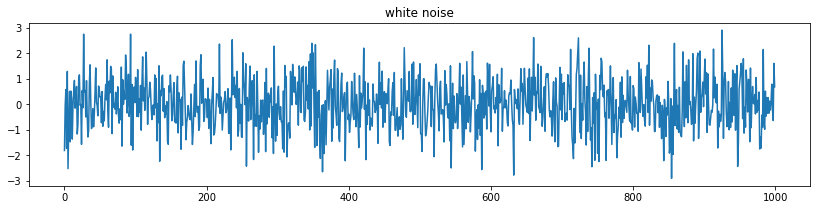

In [10]:
model = ARMA(c=0,pcoeff=[],qcoeff=[])
s1 = pd.Series(model.generate(1000))
s1.plot(title='white noise',figsize=(14,3));

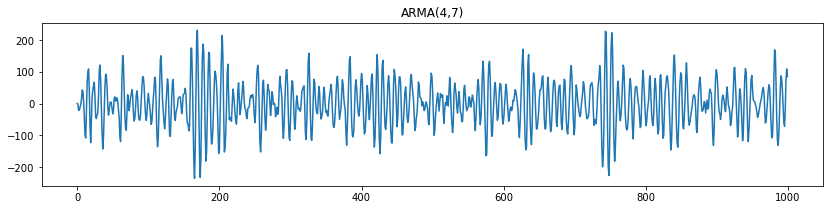

In [11]:
model = ARMA(c=0,pcoeff=[1,-1,0.5,-0.5],qcoeff=[-11,-10,-5,0,5,10,11])
s1 = pd.Series(model.generate(1000))
s1.plot(title=f'ARMA({len(model.pcoeff)},{len(model.qcoeff)})',figsize=(14,3));

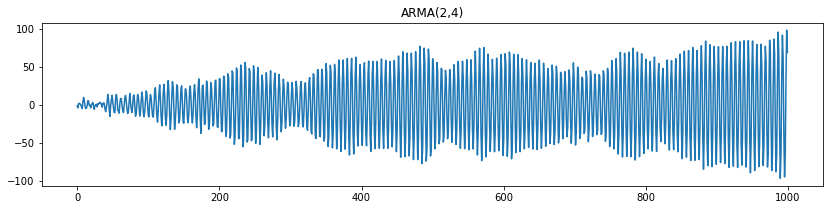

In [12]:
model = ARMA(c=0,pcoeff=[1,-1],qcoeff=[2,-2,1,-1])
s1 = pd.Series(model.generate(1000))
s1.plot(title=f'ARMA({len(model.pcoeff)},{len(model.qcoeff)})',figsize=(14,3));

## ARIMA models



### [Auto-Regressive Integratec Moving-Average model](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average)

An ARIMA(p,d,q) process is given by:

![ARIMA equation](img/arima.svg)

where $\displaystyle L$ is the lag operator, $\displaystyle d$ if the order of integration,  $\varphi _{1},\ldots ,\varphi _{p}$ are parameters of the AR component of the model, the $\theta _{1},\ldots ,\theta _{q}$ are the parameters of the MA model and the  $\varepsilon _{t}, \varepsilon _{t-1},\ldots ,\varepsilon _{t-q}$  are white noise error terms.

The ARIMA model is implemented as an ARMA model with AR parameters are expressed as $\alpha _{i} = 1 + \varphi _{i}$ for $\displaystyle i \leq \displaystyle d$, with an additional constant parameter $\displaystyle c$.

Assuming $\displaystyle d < \displaystyle p$ the next sample $\displaystyle X _{t}$ is computed as

$$\displaystyle X _{t} = \displaystyle c + \varepsilon _{t} + (1 + \varphi _{1})\displaystyle X _{t-1} + \ldots + (1 + \varphi _{d})\displaystyle X _{t-d} + \varphi _{t-d-1}\displaystyle X _{t-d-1} + \ldots + \varphi _{p}\displaystyle X _{t-p} + \theta _{1}\varepsilon _{t-1} +\ldots + \theta _{q}\varepsilon _{t-q}   $$

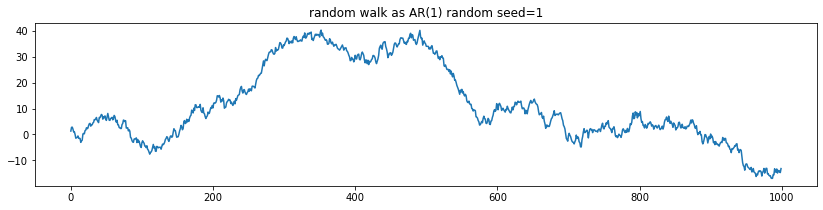

In [13]:
random.seed(1)
model = ARMA(c=0,pcoeff=[1])
s1 = pd.Series(model.generate(1000))
s1.plot(title='random walk as AR(1) random seed=1',figsize=(14,3));

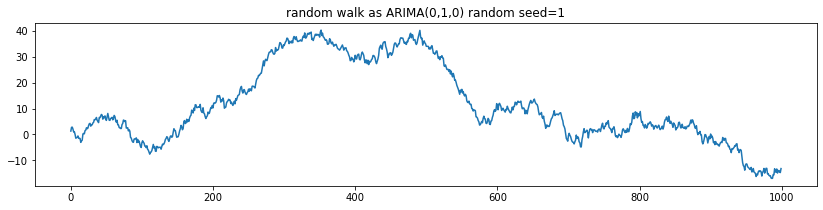

In [14]:
random.seed(1)
model = ARIMA(d=1)
s1 = pd.Series(model.generate(1000))
s1.plot(title='random walk as ARIMA(0,1,0) random seed=1',figsize=(14,3));

### Credits

notebook by Marcello Morchio 2021

repository https://github.com/mallibus/pynuTS